<a href="https://colab.research.google.com/github/muniprasadreddy/my-colab_work/blob/main/Hotel_brand_feed_back.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **problem statement:**
 A worldwide hotel brand wants to comprehend the customer feedback they have collected.
The feedback comprises textual reviews from different sources, such as online websites,
surveys, and social media. They want to find out how happy or unhappy the customers are
with the hotel services. We require you to examine the feedback and evaluate the customer
satisfaction level. Design and code a solution using Python and machine learning. Please
provide well-documented code, a model if any, and clear instructions to run the code.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import matplotlib.pyplot as plt
%matplotlib inline
import re
import random
plt.style.use("ggplot")


In [ ]:
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
english_stemmer=SnowballStemmer('english')
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data =pd.read_csv('/content/yelp_ratings.csv')

In [ ]:
print("Initial Memory Usage:")
print("Memory used in MB" ,data.memory_usage(deep=True).sum()/(1024*1024))
pre=data.memory_usage(deep=True).sum()/(1024*1024)
# Step 3: Identify columns for optimization
# For example, let's say we want to convert all int columns to int32 and all float columns to float32
int_columns = data.select_dtypes(include='int').columns
float_columns = data.select_dtypes(include='float').columns
for col in int_columns:
    c_min=data[col].min()
    c_max=data[col].max()
    if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
              data[col] = data[col].astype(np.int8)
    elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
        data[col] = data[col].astype(np.int16)
    elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
        data[col] = data[col].astype(np.int32)
    elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
        data[col] = data[col].astype(np.int64)
for col in float_columns:
  c_min=data[col].min()
  c_max=data[col].max()
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                data[col] = data[col].astype(np.float16)
  elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
      data[col] = data[col].astype(np.float32)
  else:
      data[col] = data[col].astype(np.float64)
print("Optimized Memory:")
print("Memory used in MB" ,data.memory_usage(deep=True).sum()/(1024*1024))
post=data.memory_usage(deep=True).sum()/(1024*1024)
print("++++++++++++++++++++++++")
print("lift in memory",((post-pre)/pre)*100)

Initial Memory Usage:
Memory used in MB 27.420183181762695
Optimized Memory:
Memory used in MB 26.86811065673828
++++++++++++++++++++++++
lift in memory -2.0133801490852195


In [ ]:
data.head()

,text,stars,sentiment
0,Total bill for this horrible service? Over $8G...,1.0,0
1,I *adore* Travis at the Hard Rock's new Kelly ...,5.0,1
2,I have to say that this office really has it t...,5.0,1
3,Went in for a lunch. Steak sandwich was delici...,5.0,1
4,Today was my second out of three sessions I ha...,1.0,0


In [ ]:
data.columns

Index(['text', 'stars', 'sentiment'], dtype='object')

In [ ]:
data.shape

(44530, 3)

In [ ]:
data.isna().sum()

text         0
stars        0
sentiment    0
dtype: int64

In [ ]:
data['stars'].value_counts()

5.0    22270
4.0    11061
1.0     7244
2.0     3955
Name: stars, dtype: int64

In [ ]:
data['sentiment'].value_counts()

1    33331
0    11199
Name: sentiment, dtype: int64


**10 derived columns based on the existing columns:**


Word Count: Number of words in the text.

Character Count: Number of characters in the text.

Average Word Length: Average length of words in the text.

Positive Sentiment Indicator: Binary indicator (1 or 0) based on positive sentiment.

Negative Sentiment Indicator: Binary indicator (1 or 0) based on negative sentiment.

Neutral Sentiment Indicator: Binary indicator (1 or 0) based on neutral sentiment.

High Rating Indicator: Binary indicator (1 or 0) based on a high star rating (e.g., 4 or 5 stars).

Low Rating Indicator: Binary indicator (1 or 0) based on a low star rating (e.g., 1 or 2 stars).

Text Polarity: Polarity of the text using sentiment analysis.

Text Subjectivity: Subjectivity of the text using sentiment analysis.



In [ ]:
# Function to calculate word count
def word_count(text):
    return len(text.split())

# Function to calculate character count
def character_count(text):
    return len(text)

# Function to calculate average word length
def avg_word_length(text):
    words = text.split()
    return sum(len(word) for word in words) / len(words)

# Function to calculate sentiment indicators
def sentiment_indicator(sentiment_type, sentiment):
    return 1 if sentiment == sentiment_type else 0

# Function to calculate polarity and subjectivity
def calculate_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity



In [ ]:
data['word_count'] = data['text'].apply(word_count)
data['character_count'] = data['text'].apply(character_count)
data['avg_word_length'] = data['text'].apply(avg_word_length)
data['positive_sentiment'] = data['sentiment'].apply(lambda x: sentiment_indicator('positive', x))
data['negative_sentiment'] = data['sentiment'].apply(lambda x: sentiment_indicator('negative', x))
data['neutral_sentiment'] = data['sentiment'].apply(lambda x: sentiment_indicator('neutral', x))
data['high_rating'] = data['stars'].apply(lambda x: 1 if x >= 4 else 0)
data['low_rating'] = data['stars'].apply(lambda x: 1 if x <= 2 else 0)
data['text_polarity'], data['text_subjectivity'] = zip(*data['text'].apply(calculate_sentiment))



In [ ]:
data.head()

,text,stars,sentiment,word_count,character_count,avg_word_length,positive_sentiment,negative_sentiment,neutral_sentiment,high_rating,low_rating,text_polarity,text_subjectivity
0,Total bill for this horrible service? Over $8G...,1.0,0,39,204,4.256410,0,0,0,0,1,-0.333333,0.616667
1,I *adore* Travis at the Hard Rock's new Kelly ...,5.0,1,274,1561,4.627737,0,0,0,1,0,0.315810,0.536668
2,I have to say that this office really has it t...,5.0,1,109,615,4.614679,0,0,0,1,0,0.429125,0.584000
3,Went in for a lunch. Steak sandwich was delici...,5.0,1,68,407,4.955882,0,0,0,1,0,0.832500,0.885000
4,Today was my second out of three sessions I ha...,1.0,0,673,3509,4.215453,0,0,0,0,1,0.049277,0.432407


# **`preprocesing steps`**

In [ ]:
### REmove HTML
review_text= BeautifulSoup(data.text[0]).get_text()
print (review_text)

Total bill for this horrible service? Over $8Gs. These crooks actually had the nerve to charge us $69 for 3 pills. I checked online the pills can be had for 19 cents EACH! Avoid Hospital ERs at all costs.


In [ ]:
def preprocess_text(text):
    # Clean the text
    cleaned_text = re.sub("[^a-zA-Z]", " ", text)
    cleaned_text = cleaned_text.lower().split()

    # Remove stopwords
    stops = set(stopwords.words("english"))
    cleaned_text = [w for w in cleaned_text if not w in stops]

    # Stem the words
    stemmer = PorterStemmer()
    cleaned_text = [stemmer.stem(word) for word in cleaned_text]

    return " ".join(cleaned_text)

In [ ]:
data['cleaned_text'] = data['text'].apply(preprocess_text)
print(data['cleaned_text'])

0        total bill horribl servic gs crook actual nerv...
1        ador travi hard rock new kelli cardena salon a...
2        say offic realli togeth organ friendli dr j ph...
3        went lunch steak sandwich delici caesar salad ...
4        today second three session paid although first...
                               ...                        
44525    petit caf sympa peu de place assis bonn bouff ...
44526    absolut delici food full amaz flavor owner qui...
44527    love place alway cutest dress usual pretti che...
44528    would understand hour wait food someth actual ...
44529    best place sport event servic locat amaz great...
Name: cleaned_text, Length: 44530, dtype: object


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000) # You can adjust max_features as needed
X = tfidf_vectorizer.fit_transform(data['cleaned_text'])
y = data['sentiment']


In [ ]:
X


<44530x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1447293 stored elements in Compressed Sparse Row format>

In [ ]:
y

0        0
1        1
2        1
3        1
4        0
        ..
44525    1
44526    1
44527    1
44528    0
44529    1
Name: sentiment, Length: 44530, dtype: int8

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)





# **---RandomForestClassifier**



Accuracy: 0.8997305187514035


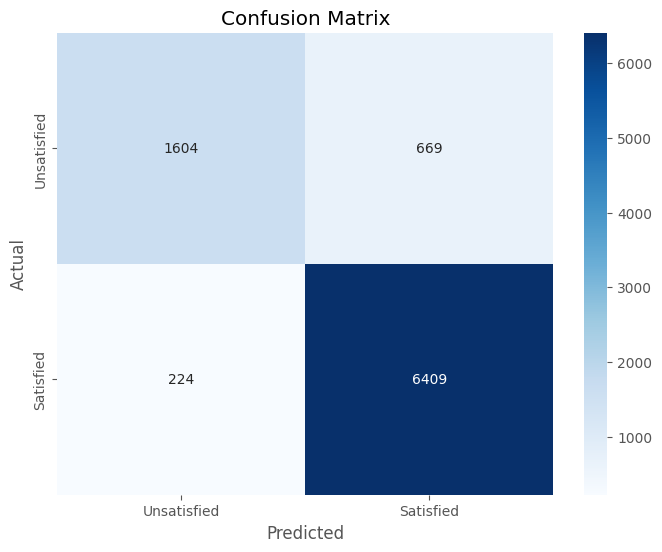

Cross-validation Scores: [0.90208848 0.9074781  0.89928138 0.90287447 0.90343589]
Mean CV Accuracy: 0.9030316640467102


In [ ]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluation
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)




# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Unsatisfied', 'Satisfied'], yticklabels=['Unsatisfied', 'Satisfied'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



# Cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=5)
print("Cross-validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


# **XGBClassifier**

Accuracy: 0.9182573545924096


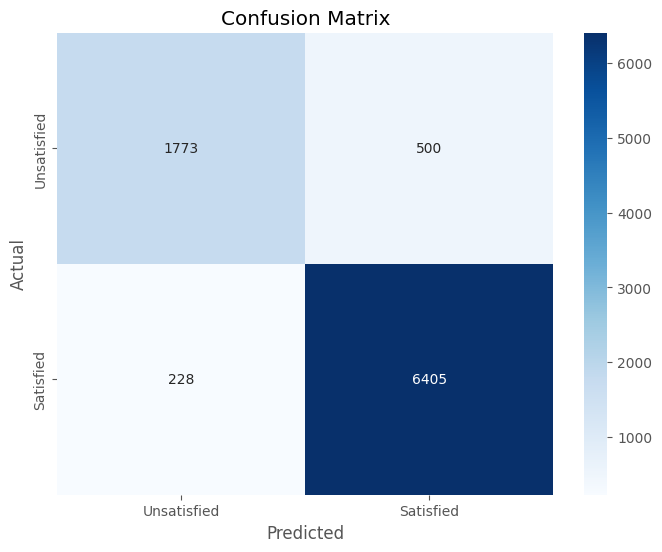

              precision    recall  f1-score   support

           0       0.89      0.78      0.83      2273
           1       0.93      0.97      0.95      6633

    accuracy                           0.92      8906
   macro avg       0.91      0.87      0.89      8906
weighted avg       0.92      0.92      0.92      8906

Cross-validation Scores:
[0.91545026 0.92106445 0.91488884 0.91825735 0.92162587]
Mean CV Score: 0.9182573545924096


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# Model building
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# Evaluation
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Unsatisfied', 'Satisfied'], yticklabels=['Unsatisfied', 'Satisfied'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

#Cross-validation
cv_scores = cross_val_score(xgb_classifier, X, y, cv=5)
print("Cross-validation Scores:")
print(cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

### Reasons to Choose XGBoost

1. **High Performance**: XGBoost is optimized for performance and efficiency, making it faster than traditional gradient boosting implementations.

2. **Regularization**: It includes L1 and L2 regularization techniques to prevent overfitting and improve model generalization.

3. **Flexibility**: XGBoost can handle various data types, including numerical and categorical features, and supports different loss functions and evaluation metrics.

4. **Feature Importance**: Provides a built-in feature importance score to identify relevant features, aiding in feature selection and understanding model behavior.

5. **Handling Missing Values**: XGBoost has capabilities to handle missing values in the dataset, reducing the need for preprocessing.


### Model Evaluation Summary

- **Accuracy:** 91.83%

|     | Precision | Recall | F1-score | Support |
| --- | --------- | ------ | -------- | ------- |
| 0   | 0.89      | 0.78   | 0.83     | 2273    |
| 1   | 0.93      | 0.97   | 0.95     | 6633    |
|     |           |        |          |         |
| **Cross-validation Scores:** | 0.915, 0.921, 0.915, 0.918, 0.922 |
| **Mean CV Score:** | 0.918 |

- **Precision**:
  - Class 0 (Unhappy customers): 89%
  - Class 1 (Happy customers): 93%

- **Recall**:
  - Class 0 (Unhappy customers): 78%
  - Class 1 (Happy customers): 97%

- **F1-score**:
  - Class 0 (Unhappy customers): 0.83
  - Class 1 (Happy customers): 0.95

- **Support**:
  - Class 0 (Unhappy customers): 2273
  - Class 1 (Happy customers): 6633


### Model Evaluation Summary

- **Accuracy:** The model achieved an accuracy of 91.83%.
- **Precision and Recall:** For unhappy customers (Class 0), the precision is 89% and the recall is 78%. For happy customers (Class 1), the precision is 93% and the recall is 97%.
- **F1-score:** The F1-score for unhappy customers is 0.83, and for happy customers, it is 0.95.
- **Support:** There are 2273 instances of unhappy customers and 6633 instances of happy customers in the test dataset.
- **Cross-validation Scores:** The cross-validation scores range from 0.915 to 0.922, with a mean cross-validation score of approximately 0.918.
